ReadWOD_PlanktonDATA

In [1]:
from scipy.io import netcdf
import os

In [4]:
from netCDF4 import Dataset
import numpy as np

In [5]:
my_example_nc_file = 'WOD_PlanktonData/ocldb1572467698.31264_OSD.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [6]:
Chl = fh.variables['Chlorophyll'][:]
z = fh.variables['z'][:]
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

Chl_units = fh.variables['Chlorophyll'].units

fh.close()
# degrees north vs degrees east
#'Chlorophyll'
#'z'
#'lat'
#'lon'

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [12]:
plt.rcParams['figure.figsize'] = [20, 10]

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 0, 'Global WOD Chlorophyll measurements')

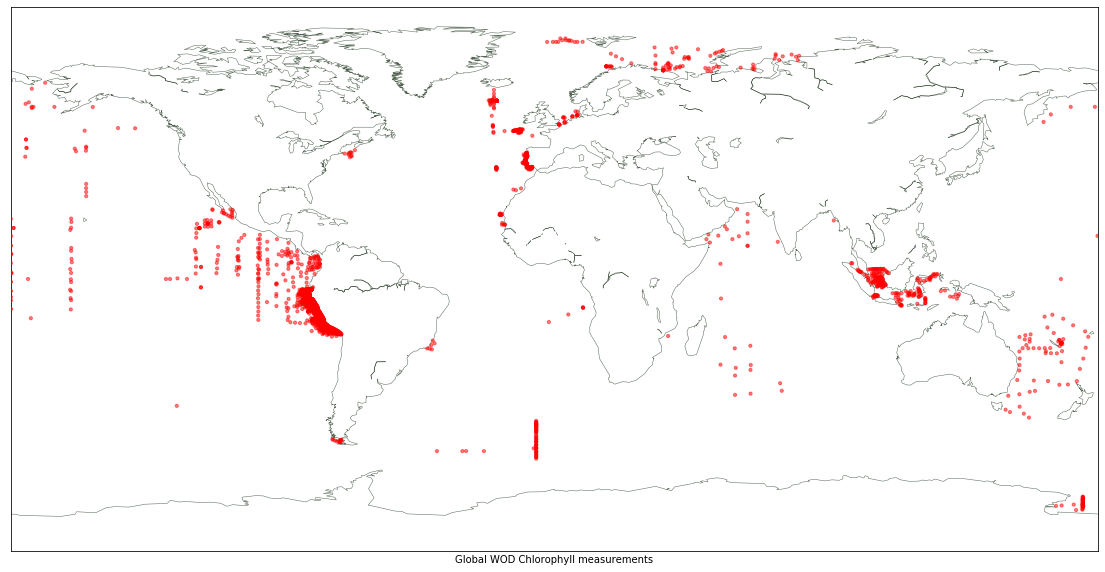

In [17]:
fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(lons, lats, Chl/Chl*10, 
           c='red', alpha=0.5, zorder=10)
ax.set_xlabel("Global WOD Chlorophyll measurements")

In [ ]:
ncfile = netcdf.netcdf_file(self.fordir + '/n0x_WOA09.nc', 'r')
nclat = ncfile.variables['lat'].data.copy()
nclon = ncfile.variables['lon'].data.copy()
ncdat = ncfile.variables[self.varname].data.copy()
ncdepth = ncfile.variables['depth'].data.copy()
ncfile.close()
mlddat = WOAForcing(self.Lat, self.Lon, self.RangeBB, 'mld')
ncdat_mld = np.zeros((12, 180, 360))
for i in range(0, 12):
    (depthindx,) = (ncdepth >= mlddat.outForcing[i]).nonzero()
    ncdat_mld[i, :, :] = ncdat[i, depthindx.min(), :, :]
nclon_transform = np.hstack((nclon[nclon > 180] - 360, nclon[nclon < 180]))
ncdat_new = np.dstack((ncdat_mld[:, :, 180:], ncdat_mld[:, :, :180]))
mskdat = np.ma.masked_less(ncdat_new, 0)
longrid, latgrid = np.meshgrid(nclon_transform, nclat)
selectarea = np.logical_and(longrid <= self.Lon + self.RangeBB, longrid >= self.Lon - self.RangeBB) * \
             np.logical_and(latgrid <= self.Lat + self.RangeBB, latgrid >= self.Lat - self.RangeBB)
outforcing = list(np.mean(mskdat[:, selectarea], axis=1))
return outforcing * 3